# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#---- REQUESTS 10 SAMPLES FOR TESTING. CHANGE TO ALL CITIES FOR FINAL CODE ---

#Store the base url
url = 'https://api.openweathermap.org/data/2.5/weather'

#List to hold the response data
response_list = []

#Iterate through the list of cities
for city in cities:
    
    #Attempt to retrieve city data
    try:
        #Build the query url
        query_url = f'{url}?q={city}&appid={weather_api_key}&units=imperial'
        
        #Print a message to show the city being processed
        print(f"Processing data for city {cities.index(city) + 1}: {city}.")
        
        #Make API request
        response = requests.get(query_url).json()

        #Create a dictionary of the desired data from the response
        response_dict = {'City': city.title(),
                         'Cloudiness': response['clouds']['all'],
                         'Country': response['sys']['country'],
                         'Date': response['dt'],
                         'Humidity': response['main']['humidity'],
                         'Lat': response['coord']['lat'],
                         'Lng': response['coord']['lon'],
                         'Max Temp': response['main']['temp_max'],
                         'Wind Speed': response['wind']['speed']
                        }
        #Add the response dictionary to the list of response data
        response_list.append(response_dict)
    
    #If the city is not found
    except:
        #Print a message and skip processing for this city
        print(f"City {cities.index(city) + 1} not found. Skipping...")

#Print a message when data retrieval is complete
print('''
-------------------------
Data retrieval complete.
-------------------------
''')

Processing data for city 1: mataura.
Processing data for city 2: hithadhoo.
Processing data for city 3: hilo.
Processing data for city 4: punta arenas.
Processing data for city 5: te anau.
Processing data for city 6: comodoro rivadavia.
Processing data for city 7: cape town.
Processing data for city 8: kodiak.
Processing data for city 9: yellowknife.
Processing data for city 10: new norfolk.
Processing data for city 11: quibdo.
Processing data for city 12: sikonge.
Processing data for city 13: hobart.
Processing data for city 14: nikolskoye.
Processing data for city 15: arani.
Processing data for city 16: sanary-sur-mer.
Processing data for city 17: necochea.
Processing data for city 18: mahebourg.
Processing data for city 19: ushuaia.
Processing data for city 20: atuona.
Processing data for city 21: port alfred.
Processing data for city 22: lorengau.
Processing data for city 23: kapaa.
Processing data for city 24: itarema.
Processing data for city 25: preston.
Processing data for city

Processing data for city 190: sovetskiy.
Processing data for city 191: mandalgovi.
Processing data for city 192: georgetown.
Processing data for city 193: ponta do sol.
Processing data for city 194: derzhavinsk.
Processing data for city 195: fortuna.
Processing data for city 196: evensk.
Processing data for city 197: xining.
Processing data for city 198: pangnirtung.
Processing data for city 199: tidore.
City 199 not found. Skipping...
Processing data for city 200: dekar.
Processing data for city 201: nhulunbuy.
Processing data for city 202: klyuchevsk.
Processing data for city 203: tevriz.
Processing data for city 204: belmonte.
Processing data for city 205: carutapera.
Processing data for city 206: cayenne.
Processing data for city 207: atbasar.
Processing data for city 208: maningrida.
Processing data for city 209: senneterre.
Processing data for city 210: yatou.
Processing data for city 211: khandyga.
Processing data for city 212: koungou.
Processing data for city 213: amderma.
Cit

City 380 not found. Skipping...
Processing data for city 381: ozuluama.
Processing data for city 382: sorong.
Processing data for city 383: chicla.
Processing data for city 384: chico.
Processing data for city 385: yenagoa.
Processing data for city 386: hatillo.
Processing data for city 387: navahrudak.
Processing data for city 388: douglas.
Processing data for city 389: teguldet.
Processing data for city 390: aykhal.
Processing data for city 391: lacombe.
Processing data for city 392: jacareacanga.
Processing data for city 393: uk.
City 393 not found. Skipping...
Processing data for city 394: rodrigues alves.
Processing data for city 395: litovko.
Processing data for city 396: bathsheba.
Processing data for city 397: norwich.
Processing data for city 398: alta.
Processing data for city 399: northam.
Processing data for city 400: bemidji.
Processing data for city 401: coquimbo.
Processing data for city 402: lompoc.
Processing data for city 403: montevideo.
Processing data for city 404:

City 579 not found. Skipping...
Processing data for city 580: ahipara.
Processing data for city 581: uthal.
Processing data for city 582: jiddah.
City 582 not found. Skipping...
Processing data for city 583: antalya.
Processing data for city 584: lesnikovo.
Processing data for city 585: gamba.
Processing data for city 586: baykit.
Processing data for city 587: srandakan.
Processing data for city 588: saint-georges.
Processing data for city 589: rorvik.
Processing data for city 590: oudtshoorn.
Processing data for city 591: nalut.
Processing data for city 592: alvarado.
Processing data for city 593: coihaique.
Processing data for city 594: bitung.
Processing data for city 595: kosgi.
City 595 not found. Skipping...
Processing data for city 596: ruatoria.
City 596 not found. Skipping...
Processing data for city 597: akyab.
Processing data for city 598: manaquiri.
Processing data for city 599: arkhangelsk.
Processing data for city 600: willmar.
Processing data for city 601: murray bridge.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a data frame of the retrieved city data
response_df = pd.DataFrame(response_list)

#Export the city data to a .csv file
response_df.to_csv(output_data_file)

#Display the data frame
response_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,96,NZ,1586458796,86,-46.19,168.86,46.35,5.19
1,Hithadhoo,64,MV,1586458797,64,-0.60,73.08,84.94,4.90
2,Hilo,1,US,1586458797,64,19.73,-155.09,77.00,2.73
3,Punta Arenas,75,CL,1586458798,62,-53.15,-70.92,62.60,4.70
4,Te Anau,12,NZ,1586458798,75,-45.42,167.72,45.84,2.64
...,...,...,...,...,...,...,...,...,...
561,Sawang Daen Din,26,TH,1586459091,60,17.48,103.46,79.32,10.47
562,Rio Gallegos,31,AR,1586459091,27,-51.62,-69.22,77.00,17.22
563,Skjervoy,100,NO,1586459092,90,70.03,20.97,30.60,19.51
564,Lasa,5,IT,1586459092,53,46.62,10.70,69.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

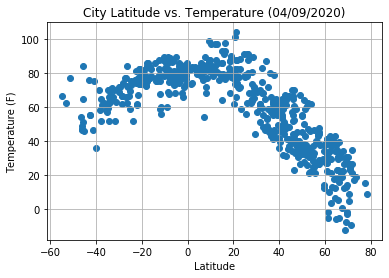

In [5]:
# --- NEED TO UPDATE DATE OF ANALYSIS FOR CHART TITLE ---
#Store the date of analysis
date = '04/09/2020'

#Create a scatter plot of latitude vs. temperature for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_temp.png')

plt.show()

#### Latitude vs. Humidity Plot

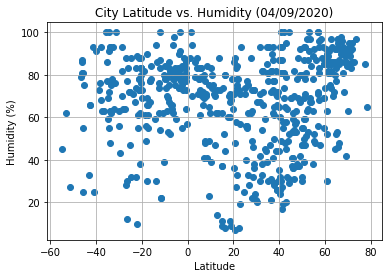

In [6]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_hum.png')

plt.show()

#### Latitude vs. Cloudiness Plot

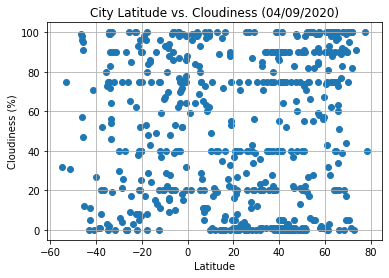

In [7]:
#Create a scatter plot of latitude vs. cloudiness for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_cloud.png')

plt.show()

#### Latitude vs. Wind Speed Plot

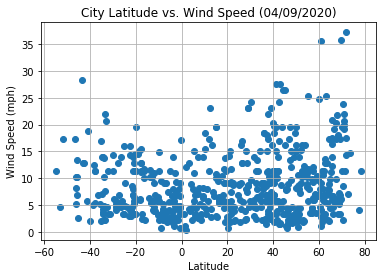

In [8]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/lat_wind.png')

plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames

#Northern hemisphere data frame
north_df = response_df.loc[response_df['Lat'] >= 0]

#Southern hemisphere data frame
south_df = response_df.loc[response_df['Lat'] < 0]

In [14]:
#Store the latitude values for the northern hemisphere
north_lat = north_df['Lat']

#Store the latitude values for the southern hemisphere
south_lat = south_df['Lat']

#Function to create calculate linear regression model and plot the model over a scatter plot
def lin_regress(x_vals, y_vals, x_lab, y_lab, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(f"{x_lab}")
    plt.ylabel(f"{y_lab}")
    plt.title(f"Linear Regression for City {x_lab} vs. {y_lab} in the {hemisphere} Hemisphere")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the northern hemisphere

The r-squared is: -0.8822758228091471


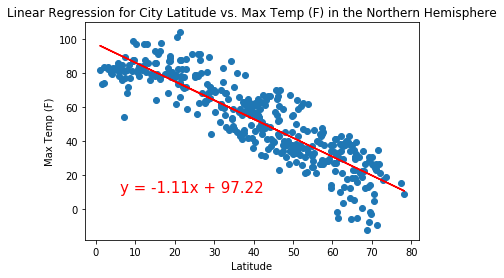

In [16]:
lin_regress(north_lat, north_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6551720230664742


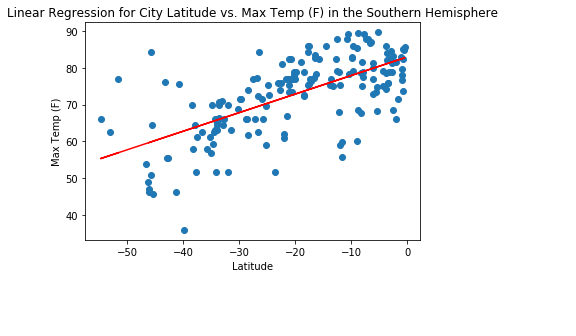

In [18]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the southern hemisphere
lin_regress(south_lat, south_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Southern')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2801904518929469


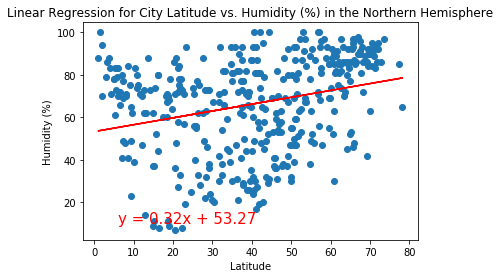

In [22]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the northern hemisphere
lin_regress(north_lat, north_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15721796004809963


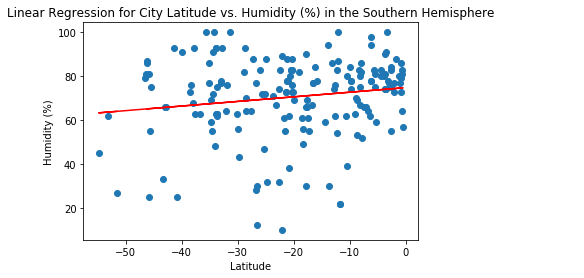

In [23]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the southern hemisphere
lin_regress(south_lat, south_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19295477239784176


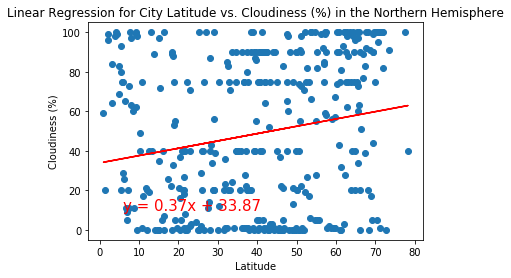

In [24]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the northern hemisphere
lin_regress(north_lat, north_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1298262872071064


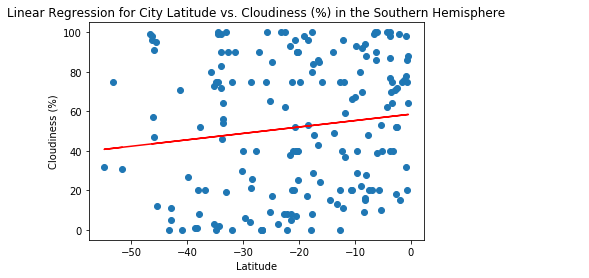

In [25]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the southern hemisphere
lin_regress(south_lat, south_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1992245221904208


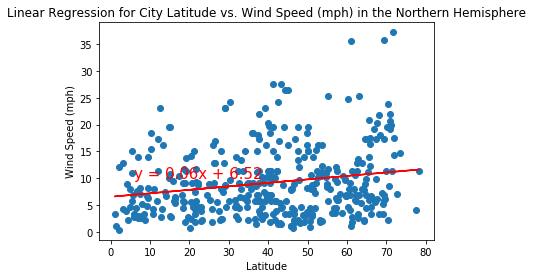

In [26]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the northern hemisphere
lin_regress(north_lat, north_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.30470273665525344


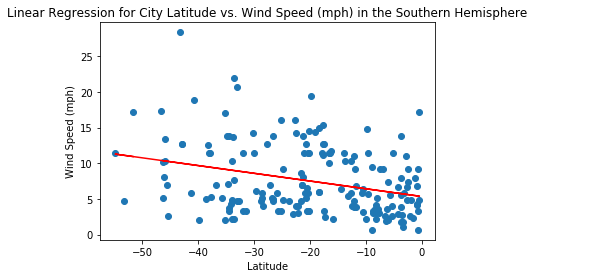

In [27]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the southern hemisphere
lin_regress(south_lat, south_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Southern')